# Decision Tree

## 1. Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

---

## 2. Problem Statement

We are required to classify the given objects as Cat or not Cat using Decision Tree

---

## 3. Dataset

|                                                     |   Ear Shape | Face Shape | Whiskers |   Cat  |
|:---------------------------------------------------:|:---------:|:-----------:|:---------:|:------:|
| <img src="images/0.png" alt="drawing" width="50"/> |   Pointy   |   Round     |  Present  |    1   |
| <img src="images/1.png" alt="drawing" width="50"/> |   Floppy   |  Not Round  |  Present  |    1   |
| <img src="images/2.png" alt="drawing" width="50"/> |   Floppy   |  Round      |  Absent   |    0   |
| <img src="images/3.png" alt="drawing" width="50"/> |   Pointy   |  Not Round  |  Present  |    0   |
| <img src="images/4.png" alt="drawing" width="50"/> |   Pointy   |   Round     |  Present  |    1   |
| <img src="images/5.png" alt="drawing" width="50"/> |   Pointy   |   Round     |  Absent   |    1   |
| <img src="images/6.png" alt="drawing" width="50"/> |   Floppy   |  Not Round  |  Absent   |    0   |
| <img src="images/7.png" alt="drawing" width="50"/> |   Pointy   |  Round      |  Absent   |    1   |
| <img src="images/8.png" alt="drawing" width="50"/> |    Floppy  |   Round     |  Absent   |    0   |
| <img src="images/9.png" alt="drawing" width="50"/> |   Floppy   |  Round      |  Absent   |    0   |


We will use **one-hot encoding** to encode the categorical features. They will be as follows:

- Ear Shape: Pointy = 1, Floppy = 0
- Face Shape: Round = 1, Not Round = 0
- Whiskers: Present = 1, Absent = 0

Therefore, we have two sets:

- `X_train`: for each example, contains 3 features:
    - Ear Shape (1 if pointy, 0 otherwise)
    - Face Shape (1 if round, 0 otherwise)
    - Whiskers (1 if present, 0 otherwise)
            
- `y_train`: whether the animal is a cat
    - 1 if the animal is a cat
    - 0 otherwise

### 3.1 One Hot Encoding

In [3]:
X_train = np.array([[1, 1, 1],
[0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [4]:
print("First few elements of X_train:\n", X_train[:5])
print("Type of X_train:",type(X_train))
print("-----------------------------------------")
print("First few elements of y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

First few elements of X_train:
 [[1 1 1]
 [0 0 1]
 [0 1 0]
 [1 0 1]
 [1 1 1]]
Type of X_train: <class 'numpy.ndarray'>
-----------------------------------------
First few elements of y_train: [1 1 0 0 1]
Type of y_train: <class 'numpy.ndarray'>


In [5]:
print ('The shape of X_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

The shape of X_train is: (10, 3)
The shape of y_train is:  (10,)
Number of training examples (m): 10


----

## 4. Building the Model

A Decision Tree classifies the given objects in a dataset using the features that has the best information Gain. It works on few of the steps that will be built in this section

### 4.1 Compute Entropy

Formula,
$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$
Here,
- $p_1$ = impurity, i.e. $p_1 = \frac{no. of Cats}{total no. of Objects}$
- $H(p_1)$ is the Entropy
- If $H(p_1) = 0$, all the objects in the dataset are cat or not cat
- If $H(p_1) = 1$, when the dataset contains 50% cat and 50% not cat

In [6]:
def compute_entropy(y):

    entropy = 0

    if(len(y) != 0):
        p1 = len(y[y == 1])/len(y)

        if(p1 == 0 or p1 == 1):
            entropy = 0.
        else:
            entropy = -p1*np.log2(p1) - (1-p1)*np.log2(1-p1)
    
    return entropy

In [7]:
print("Entropy at root node: ", compute_entropy(y_train)) 

Entropy at root node:  1.0


**Conclusion: Entropy at root note is maximum, 50% cat and 50% not cat**

### 4.2 Splitting the dataset

We split the dataset into right and left indices according to the feature that gives the best information gain. We will calculate the information gain later on this model.

In [8]:
def split_dataset(X, feature):

    left_indices = []
    right_indices = []
    
    for i,x in enumerate(X):
        if(x[feature] == 1):
            left_indices.append(i) # Appending the index value
        else:
            right_indices.append(i)
    
    return left_indices, right_indices

In [9]:
# Case

feature = 0  # Based on Ear Shape

left_indices, right_indices = split_dataset(X_train, feature)

print("CASE 1: Split based on Ear Shape")
print("Left indices: ", left_indices)
print("Right indices: ", right_indices)

CASE 1: Split based on Ear Shape
Left indices:  [0, 3, 4, 5, 7]
Right indices:  [1, 2, 6, 8, 9]


### 4.3 Calculate Information Gain

Information Gain simply represents how efficient our split is, 
- If Information Gain is 1, it represents maximum gain which means that the left and right split has successfully classified 100% of the cats from not cats

We calculate this using the formula,
$$\text{Information Gain} = H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$

In the following code cell, we will calculate weighted entropy which is represented by the formula:
$$(w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$
Where, 
- $w^{\text{left}} = \frac{\text{total no. of object in left split}}{\text{total no. of object in root node}}$
- $p_1^{\text{left}} = \frac{\text{no. of cat in left split}}{\text{total no. of object in left split}}$

#### Weighted Entropy

In [10]:
def compute_weighted_entropy(X,y, left_indices, right_indices):
    w_left = len(left_indices)/len(X)
    w_right = len(right_indices)/len(X)
    p_left = y[left_indices]
    p_right = y[right_indices]

    weighted_entropy = w_left * compute_entropy(p_left) + w_right * compute_entropy(p_right)

    return weighted_entropy
    

In [11]:
left_indices, right_indices = split_dataset(X_train, 0)
compute_weighted_entropy(X_train, y_train, left_indices, right_indices)

0.7219280948873623

**Conclusion: $(w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$ = 0.72**

To calculate the information gain, we substract this value from entropy at root node $H(p_1^\text{node})$

#### Information Gain

In [12]:
def compute_information_gain(X,y, feature):


    left_indices, right_indices = split_dataset(X, feature)

    node_entropy = compute_entropy(y)
    weighted_entropy = compute_weighted_entropy(X, y, left_indices, right_indices)

    information_gain = node_entropy - weighted_entropy

    return information_gain

In [13]:
info_gain0 = compute_information_gain(X_train, y_train, feature=0)
print("Information Gain from splitting the root on Ear Shape: ", info_gain0)

info_gain1 = compute_information_gain(X_train, y_train, feature=1)
print("Information Gain from splitting the root on Face Shape: ", info_gain1)

info_gain2 = compute_information_gain(X_train, y_train, feature=2)
print("Information Gain from splitting the root on Whiskers: ", info_gain2)

Information Gain from splitting the root on Ear Shape:  0.2780719051126377
Information Gain from splitting the root on Face Shape:  0.034851554559677034
Information Gain from splitting the root on Whiskers:  0.12451124978365313


### 4.4 Get the Best Split

In [14]:
def get_best_split(X, y):
    
    num_features = X.shape[1]
    best_feature = -1
    max_info_gain = 0

    for feature in range(num_features):
        info_gain = compute_information_gain(X, y, feature)

        if(info_gain > max_info_gain):
            max_info_gain = info_gain
            best_feature = feature
    
    return best_feature

In [15]:
best_feature = get_best_split(X_train, y_train)
print("Best feature to split on: %d" % best_feature)

Best feature to split on: 0


---

## 5. Building the Decision Tree

 Depth 0, Root: Split on feature: 0
- Depth 1, Left: Split on feature: 1
  -- Left leaf node with indices [0, 4, 5, 7]
  -- Right leaf node with indices [3]
- Depth 1, Right: Split on feature: 2
  -- Left leaf node with indices [1]
  -- Right leaf node with indices [2, 6, 8, 9]


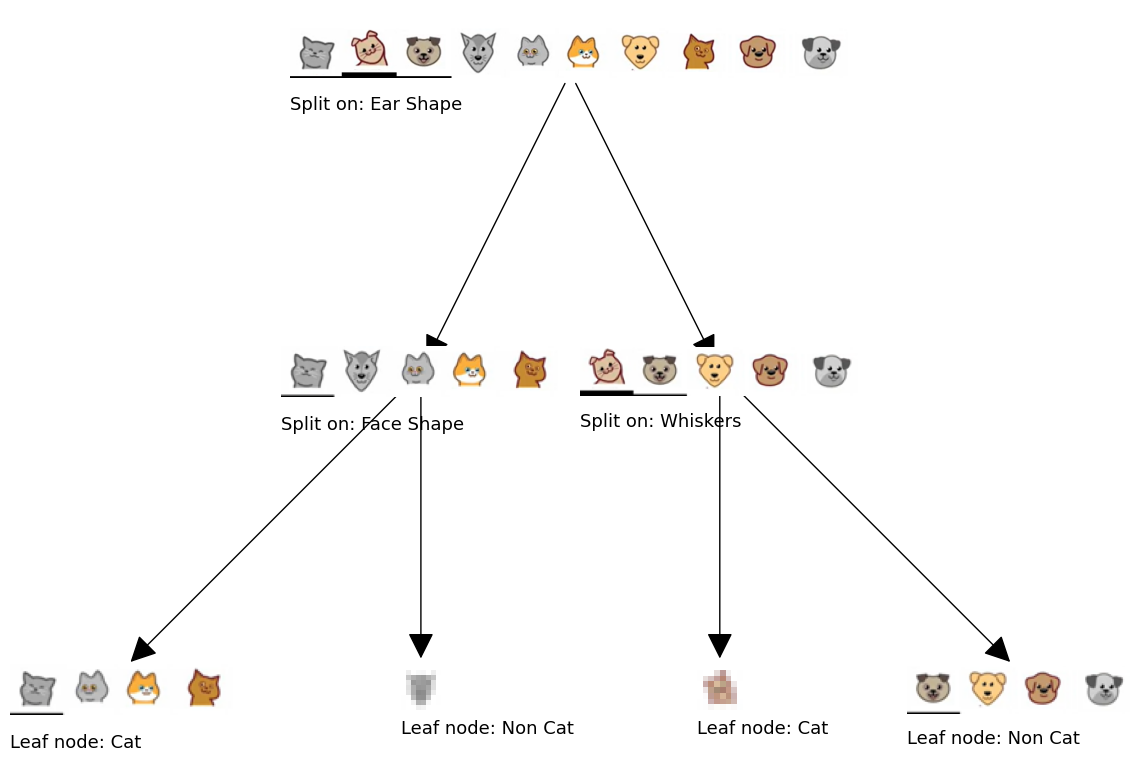

In [17]:
tree = []
build_tree_recursive(X_train, y_train, [0,1,2,3,4,5,6,7,8,9], "Root", max_depth=2, current_depth=0, tree = tree)
generate_tree_viz([0,1,2,3,4,5,6,7,8,9], y_train, tree)